<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/RectanguloTrapecios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calcular la integral de la siguiente funcion

$$
\int_0^1e^{x^2}dx\approx(1-0)f(0)
$$

In [ ]:
import numpy as np



In [ ]:
def f(x):
  return np.exp(x**2)

In [ ]:
a,b=0,1
n=2
h=(b-a)/n
integral=h*(f(0)+f(0.5))
integral

1.1420127083438707

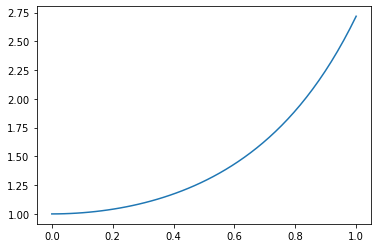

In [ ]:
import matplotlib.pyplot as plt
a,b=0,1
xs=np.linspace(a,b)
plt.plot(xs,f(xs))
plt.show()

In [ ]:
def reglaRectangulos(f,a,b,n):
  h=(b-a)/n
  xs=np.linspace(a,b,n+1)
  ys=f(xs)
  return h*sum(ys[:n])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.interpolate import lagrange
from numpy import random

def grafica_integral(f,a,b,n,tipo,titulos):
  x = np.linspace (a, b)
  y = f(x)
  fig,ax = plt.subplots ()
  ax.plot(x, y, 'b', linewidth =1.7)
  ax.set_ylim(bottom=0)

  ciclo=range(n)
  h=(b-a)/n
  if tipo==2:
    x0,x1,x2=a,a+h,a+2*h
    ciclo=range(0,n,2)
  elif tipo==3:
    x0,x1,x2,x3=a,a+h,a+2*h,a+3*h
    ciclo=range(0,n,3)
  ix = np.linspace (a,b,n+1)
  iy = f(ix)
  patterns =( '/','x','/','\\ ','O','.','o','*','\\ ','/','-','x','+',' ')
  colores = ('lightsalmon','orangered','none','purple','aqua','teal','beige','gold')
  
  for i in ciclo:
    if tipo==0:
      verts = [( ix[i], 0) , (ix[i],iy[i]) ,(ix[i+1] , iy[i]) , (ix[i+1] , 0)]
    elif tipo==1:
      verts = [( ix[i], 0) , (ix[i],iy[i]) ,(ix[i+1] , iy[i+1]) , (ix[i+1] , 0)]
    elif tipo==2:
      xx=np.array([x0,x1,x2])
      yy=np.array([f(x0),f(x1),f(x2)])
      pol=lagrange(xx,yy)
      ix=np.linspace(x0,x2)
      iy=pol(ix)
      verts=[(x0,0),*zip(ix,iy),(x2,0)]
      x0,x1,x2=x2,x2+h,x2+2*h
    elif tipo==3:
      xx=np.array([x0,x1,x2,x3])
      yy=np.array([f(x0),f(x1),f(x2),f(x3)])
      pol=lagrange(xx,yy)
      ix=np.linspace(x0,x3)
      iy=pol(ix)
      verts=[(x0,0),*zip(ix,iy),(x3,0)]
      x0,x1,x2,x3=x3,x3+h,x3+2*h,x3+3*h
      
    poly = Polygon(verts , facecolor = random.choice(colores), edgecolor = '0.6',hatch = random.choice(patterns))
    ax.add_patch( poly )
      
 
  plt.title(titulos[0])
  plt.xlabel(titulos[1])
  plt.ylabel(titulos[2])
  return plt

In [ ]:
integral = reglaRectangulos(f,0,1,10)
integral

1.3812606013158462

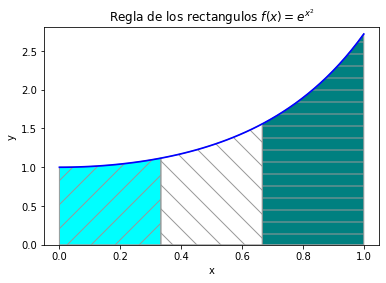

In [ ]:
grafica=grafica_integral(f,0,1,9,3,['Regla de los rectangulos $f(x)=e^{x^2}}$','x','y']);


Usando la regla de los trapecios simpe

In [ ]:
integral=(b-a)*(f(a)+f(b))/2
integral

1.8591409142295225

In [ ]:
def reglaTrapecios(f,a,b,n):
  h=(b-a)/n
  xs=np.linspace(a,b,n+1)
  ys=f(xs)
  return h/2*(ys[0]+2*sum(ys[1:n])+ys[n])

In [ ]:
integral=reglaTrapecios(f,0,1,10)
integral

1.4671746927387985

La cantidad de masa transportada por una tubería en un periodo de tiempo se calcula con la ecuación

$$
M=\int_2^8(9+4cos^2(0.4t))(5e^{0.5t}+2e^{0.15t})dt
$$

In [ ]:
def f(t):
  return (9+4*np.cos(0.4*t)**2)*(5*np.exp(0.5*t)+2*np.exp(0.15*t))

In [ ]:
masa=reglaRectangulos(f,2,8,10)
masa

5346.488904102593

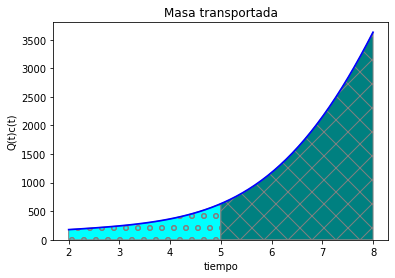

In [ ]:
grafica_integral(f,2,8,6,3,['Masa transportada','tiempo','Q(t)c(t)']);

In [ ]:
masa=reglaTrapecios(f,2,8,40)
masa

6335.143806834599

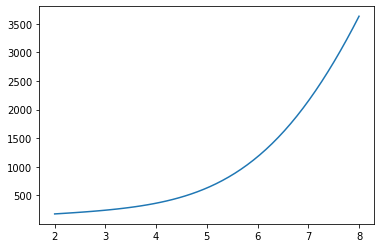

In [ ]:
ts=np.linspace(2,8)
m=f(ts)
plt.plot(ts,m)
plt.show()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 12.2MB/s 
     |████████████████████████████████| 6.5MB 49.6MB/s 
     |████████████████████████████████| 14.8MB 334kB/s 


In [ ]:
import geopandas
import matplotlib
orig = matplotlib.rcParams['figure.figsize']
matplotlib.rcParams['figure.figsize'] = [orig[0] * 1.5, orig[1]]
import matplotlib.pyplot as plt 
plt.close('all')


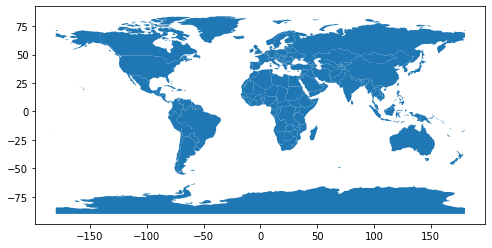

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()

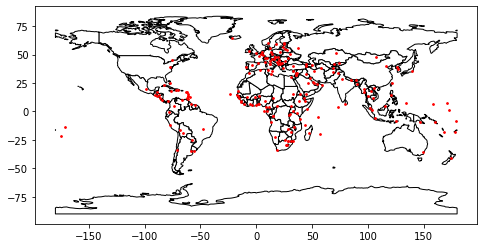

In [ ]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=3);